#Homework

**Homework is done by the student of group 331 Ryakhovskiy Aleksey**

## Problem 1: Serial test

Idea: break the sequence $x_1, x_2, x_3, ..., x_{2n}$ into consecutive series of length $2$: $(x_1, x_2), (x_3, x_4), ..., (x_{2n-1}, x_{2n})$ and look at each element as a random and independent point in $2D$ space. Next, apply chi-square. Similarly, one can construct series of length $3, 4$, etc.

Implement serial test and apply to a `samples`

In [ ]:
import numpy as np
from scipy.stats import chisquare

def serial_test(seq, dim=2, k=10):
    if len(seq) < dim:
         ValueError("The sequence is too short for the given dimensionality.")

    seq = seq[:(len(seq) - len(seq) % dim)]
    points = np.array(seq).reshape(-1, dim)

    bins = k ** dim
    observed = np.histogramdd(points, bins=k, range=[[0, 1]]*dim)[0].ravel()
    expected = np.full(bins, len(points) / bins)

    chi_stat, p_value = chisquare(observed, expected)
    df = bins - 1

    return chi_stat, df, p_value

In [ ]:
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

# setting the seed
rng.current = 1
samples = [rng() for _ in range(10000)]


k = 10
print(f"length of rng() samples: {len(samples)}\n")
for dim in range(1, 6):
    print(f"{dim}D points, {k} bins(each axis): p-value = {serial_test(samples, dim, k)[2]}")

length of rng() samples: 10000

1D points, 10 bins(each axis): p-value = 0.9825553875075259
2D points, 10 bins(each axis): p-value = 0.7895660152477539
3D points, 10 bins(each axis): p-value = 0.37755820732038237
4D points, 10 bins(each axis): p-value = 0.01134913063418066
5D points, 10 bins(each axis): p-value = 0.32612394025764035


## Problem 2* : Permutation test

We again decompose the sequence $x_1, x_2, x_3, ..., x_{dn}$ into consecutive series of length $d$: $(x_1, ..., x_d), (x_{d+1}, x_{2d+d}), \ldots, (x_{nd-d+1}, x_{nd})$. A series of $d$ elements can be ordered in $d!$ ways and each way of ordering is equally probable. Hence the idea of the test is to count how many times each ordering occurs among $n$ series and apply the $\chi^2$ test.

Implement permutation test and apply to a `samples`

In [ ]:
import numpy as np
from scipy.stats import chisquare
from itertools import permutations

def permutation_test(seq, d=2):
    if len(seq) < d:
        raise ValueError("The sequence is too short for the given permutation size.")

    seq = seq[:(len(seq) - len(seq) % d)]
    blocks = np.array(seq).reshape(-1, d)

    perms = list(permutations(range(d)))
    perm_count = {perm: 0 for perm in perms}

    for block in blocks:
        ranks = np.argsort(block)
        perm_count[tuple(ranks)] += 1

    observed = np.array(list(perm_count.values()))
    expected = np.full(len(perms), len(blocks) / len(perms))

    chi_stat, p_value = chisquare(observed, expected)
    df = len(perms) - 1

    return chi_stat, df, p_value

In [ ]:
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

# setting the seed
rng.current = 1
samples = [rng() for _ in range(30000)]


print(f"length of rng() samples: {len(samples)}\n")
for d in range(2, 11):
    print(f"d = {d}, p_value =", permutation_test(samples, d)[2])

length of rng() samples: 30000

d = 2, p_value = 0.578745780684579
d = 3, p_value = 0.132945366860605
d = 4, p_value = 0.2611084836183072
d = 5, p_value = 0.41366193889359476
d = 6, p_value = 0.01524439824229928
d = 7, p_value = 0.9249987997365704
d = 8, p_value = 0.5989784161429084
d = 9, p_value = 0.4289001101445593
d = 10, p_value = 0.5851099337608714


## Problem 3


Provide a statistical test to show that `rng_bad` has problems but `rng_good` does not.

In [ ]:
def rng_bad(m=2**31, a=65539, c=0):
    rng_bad.current = (a * rng_bad.current + c) % m
    return rng_bad.current / m
rng_bad.current = 1

def rng_good(m=2**32, a=1103515245, c=12345):
    rng_good.current = (a * rng_good.current + c) % m
    return rng_good.current / m
rng_good.current = 1


count = 100000
bad = [rng_bad() for _ in range(count)]
good = [rng_good() for _ in range(count)]


k = 20
print(f"count of rng_...() numbers: {count}\n")

print("RNG_BAD()`s serial test:")
for dim in range(1, 6):
    print(f"{dim}D points, {k} bins(each axis): p-value = {serial_test(bad, dim, k)[2]}")

print()
print("RNG_GOOD()`s serial test:")
for dim in range(1, 6):
    print(f"{dim}D points, {k} bins(each axis): p-value = {serial_test(good, dim, k)[2]}")

count of rng_...() numbers: 100000

RNG_BAD()`s serial test:
1D points, 20 bins(each axis): p-value = 0.550608980478678
2D points, 20 bins(each axis): p-value = 0.9006651564586853
3D points, 20 bins(each axis): p-value = 0.0
4D points, 20 bins(each axis): p-value = 0.0
5D points, 20 bins(each axis): p-value = 0.0

RNG_GOOD()`s serial test:
1D points, 20 bins(each axis): p-value = 0.6099945841502987
2D points, 20 bins(each axis): p-value = 0.7373898781953223
3D points, 20 bins(each axis): p-value = 0.6115962344588506
4D points, 20 bins(each axis): p-value = 0.7793254458978371
5D points, 20 bins(each axis): p-value = 0.4745236112565555


On 3D, 4D, 5D you can see that `rng_bad()` is bad random.

But `rng_good()` is good on most tests, but for example on `count=30000`, `k=26` we sometimes see extremely low p-value on 3D:



In [ ]:
count = 30000
rng_good.current = 1
good = [rng_good() for _ in range(count)]

k = 26
dim = 3
print(f"{dim}D points, {k} bins(each axis): p-value = {serial_test(good, dim, k)[2]}")

3D points, 26 bins(each axis): p-value = 0.011807571612874454


## Problem 4

Simulate a sample of 1000 from a discrete distribution on a set of digits $0, 1, 2, \ldots, 9$ with weights $0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2$. Construct a histogram from the sample. Optimise the algorithm by ordering the weights.

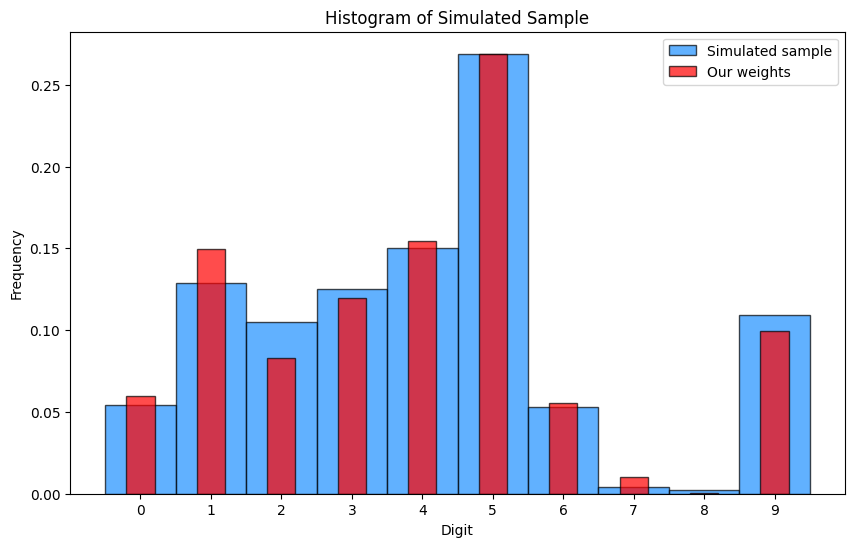

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

weights = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
norm_weights = weights / weights.sum()
cumulative_weights = np.cumsum(norm_weights)

random_numbers = np.random.rand(1000)
discrete = np.zeros(1000, dtype=int)

for i, r in enumerate(random_numbers):
    discrete[i] = np.searchsorted(cumulative_weights, r)

plt.figure(figsize=(10, 6))
plt.hist(discrete, bins=np.arange(11) - 0.5, density=True, edgecolor='black', alpha=0.7, label='Simulated sample', color='dodgerblue')
plt.bar(np.arange(10), norm_weights, width=0.4, color='red', edgecolor='black', alpha=0.7, label='Our weights')


plt.xticks(np.arange(10))
plt.title('Histogram of Simulated Sample')
plt.xlabel('Digit')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Problem 5

Simulate a sample of size 1000 from the distribution $\operatorname{Exp}(\lambda)$ using the Inverse transform method. Construct a sample histogram and an accurate plot of the distribution density.

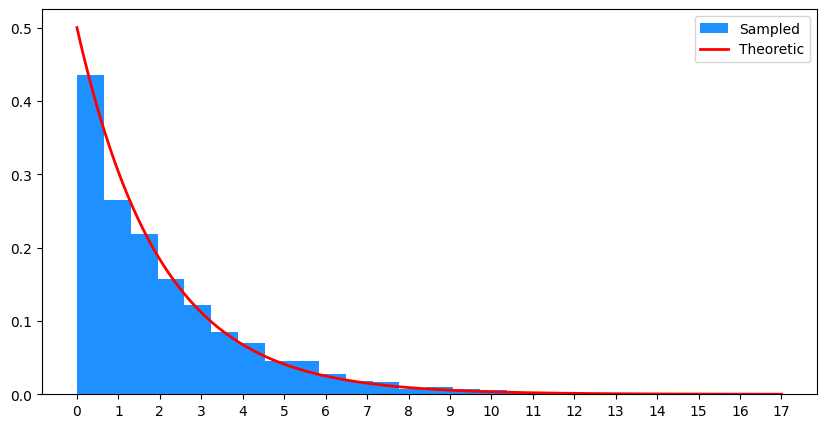

In [ ]:
lambda_coef = 0.5

sample = np.random.rand(1000)
sample = -np.log(1 - sample) / lambda_coef

plt.figure(figsize=(10, 5))
plt.xticks(np.arange(18))
plt.hist(sample, bins=20, density=True, label="Sampled", color='dodgerblue')
plt.plot(np.linspace(0, 17, 200), np.exp(-np.linspace(0, 17, 200) * lambda_coef) * lambda_coef, label = "Theoretic", color = 'red', lw=2)
plt.legend()
plt.show()

## Problem 6

Justify (orally) that the accept-reject method really samples from the required distribution. Simulate $1000$ points from the distribution with density $e^xcos^2x \cdot \mathbb{I}_{[-\frac\pi2, \frac\pi2]}$. Plot the sampled histogram on the sample and compare it with the plot of the exact density function.

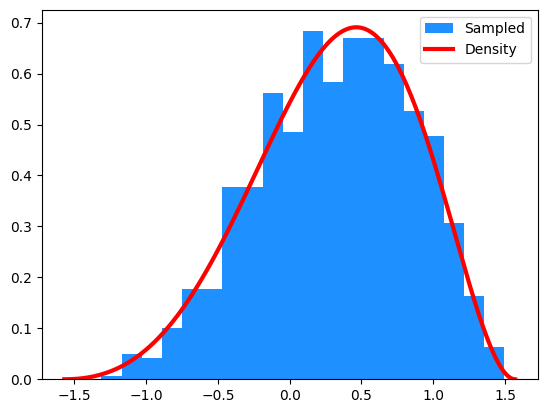

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

density = lambda x: np.exp(x) * np.cos(x)**2
square = quad(density, -np.pi/2, np.pi/2)[0]

n = 10000
x = np.random.uniform(-np.pi/2, np.pi/2, n)
y = np.random.uniform(0, np.exp(np.pi/2), n)
samples = x[y <= density(x)][:1000]

plt.hist(samples, bins=20, density=True, alpha=1, color='dodgerblue', label='Sampled')
plt.plot(x := np.linspace(-np.pi/2, np.pi/2, 200), density(x) / square, color='red', lw=3, label='Density')

plt.legend()
plt.show()

## Problem 7

Model and depict a sample of 500 points uniformly distributed within a given triangle without using a selection method.

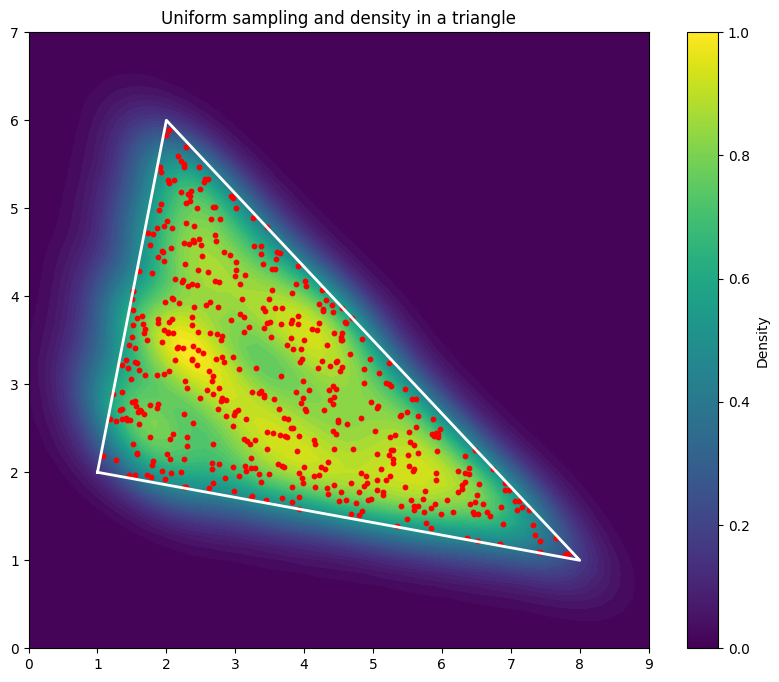

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

A = np.array([1, 2])
B = np.array([2, 6])
C = np.array([8, 1])

n_points = 500
u = np.random.rand(n_points)
v = np.random.rand(n_points)
mask = u + v > 1
u[mask] = 1 - u[mask]
v[mask] = 1 - v[mask]

sample = A + np.outer(u, B - A) + np.outer(v, C - A)

x, y = sample[:, 0], sample[:, 1]
kde = gaussian_kde(np.vstack([x, y]))

n = 50
xx, yy = np.meshgrid(np.linspace(0, 9, n), np.linspace(0, 7, n))
zz = np.array([[kde.pdf([xx[i, j], yy[i, j]])[0] for j in range(n)] for i in range(n)])

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, zz, levels=50)
plt.scatter(x, y, color='red', s=10)
triangle = np.array([A, B, C, A])
plt.plot(triangle[:, 0], triangle[:, 1], 'w-', lw=2)
plt.xlim(0, 9)
plt.ylim(0, 7)
plt.colorbar(label='Density')
plt.title("Uniform sampling and density in a triangle")
plt.show()


## Problem 8


Model without using the selection method a sample of $500$ points uniformly distributed inside the unit circle. Picture the obtained points. Do they really fill the circle uniformly?

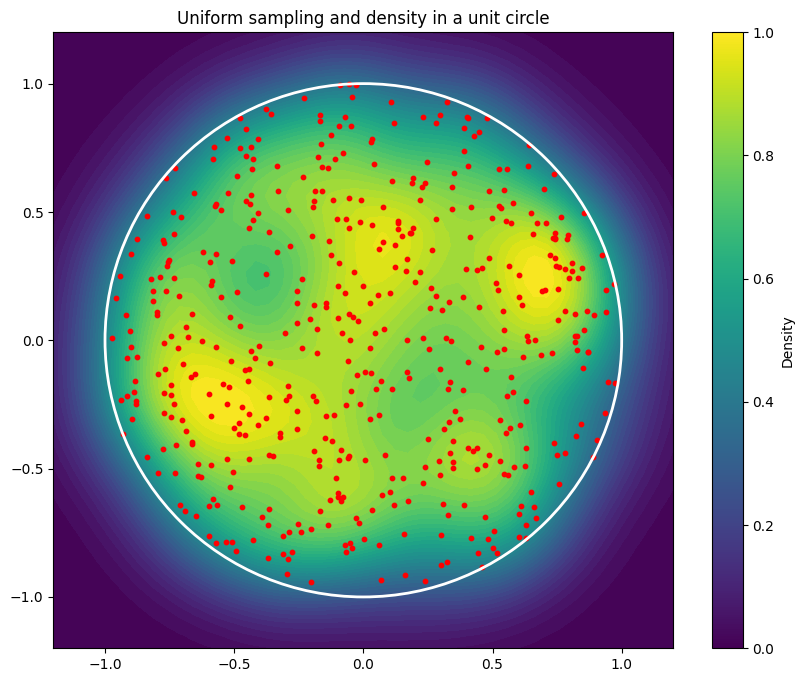

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

n_points = 500

angles = np.random.uniform(0, 2 * np.pi, n_points)
radiuses = np.sqrt(np.random.uniform(0, 1, n_points))

x = radiuses * np.cos(angles)
y = radiuses * np.sin(angles)

kde = gaussian_kde(np.vstack([x, y]))

n = 50
xx, yy = np.meshgrid(np.linspace(-1.2, 1.2, n), np.linspace(-1.2, 1.2, n))
zz = np.array([[kde.pdf([xx[i, j], yy[i, j]])[0] for j in range(n)] for i in range(n)])

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, zz, levels=50)
plt.scatter(x, y, color='red', s=10)

circle = plt.Circle((0, 0), 1, color='w', fill=False, linewidth=2)
plt.gca().add_patch(circle)

plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.colorbar(label='Density')
plt.title("Uniform sampling and density in a unit circle")
plt.show()

## Problem 9

Prove (orally) that the following algorithm (**Box-Muller algorithm**, https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform) generates a sample of independent $\mathcal{N}(0,1)$ random variables. Modify the method to exclude calls of trigonometric functions `np.sin` and `np.cos`. Using the modified method, simulate a sample size of $1000$ from a $2D$ Gaussian distribution with mean $\mu$ and covariance matrix $\Sigma$, where
$$\mu = \begin{pmatrix} 4 \\ 7 \end{pmatrix}^T, \quad \Sigma = \begin{pmatrix} 20 & -4 \\ -4 & 40 \end{pmatrix}.$$
Construct a 2D histogram of the resulting distribution. Compare the sample mean and covariance matrix with the exact values.

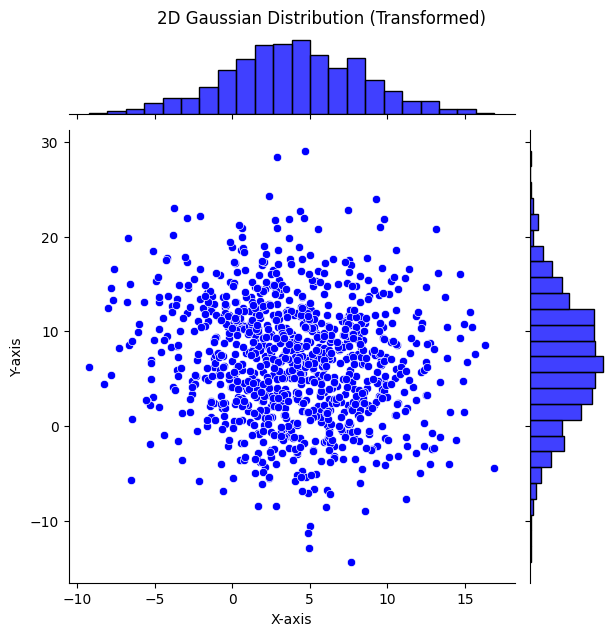

Mean:
  Sample Mean: [3.9532210085216493, 6.825556885464969]
  Theoretic Mean: [4, 7]
  Diff: [-0.04677899147835074, -0.17444311453503136]

Cov Matrix:
  Sample Cov Matrix:
 [[19.91913124 -3.71812033]
 [-3.71812033 39.75366606]]
  Theoretic Cov Matrix:
 [[20 -4]
 [-4 40]]
  Diff:
 [[-0.08086876  0.28187967]
 [ 0.28187967 -0.24633394]]


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

mu = np.array([4, 7])
Sigma = np.array([[20, -4], [-4, 40]])
L = np.linalg.cholesky(Sigma)

n_points = 1000
z0, z1 = [], []

while len(z0) < n_points:
    x, y = np.random.uniform(-1, 1, 2)
    s = x**2 + y**2
    if 0 < s <= 1:
        factor = np.sqrt(-2 * np.log(s) / s)
        z0.append(x * factor)
        z1.append(y * factor)

z = np.vstack((z0[:n_points], z1[:n_points]))

x, y = mu.reshape(2, 1) + L @ z

sns.jointplot(x=x, y=y, color="blue").set_axis_labels('X-axis', 'Y-axis')
plt.suptitle('2D Gaussian Distribution (Transformed)', y=1.02)
plt.show()

print("Mean:")
print("  Sample Mean:", [np.mean(x), np.mean(y)])
print("  Theoretic Mean:", [mu[0], mu[1]])
print("  Diff:", [np.mean(x) - mu[0], np.mean(y) - mu[1]])
print()
print("Cov Matrix:")
print("  Sample Cov Matrix:\n", np.cov(x, y))
print("  Theoretic Cov Matrix:\n", Sigma)
print("  Diff:\n", np.cov(x, y) - Sigma)

## Problem 10*


Implement a method of generating a random partition of an n-element set into subsets. Use it to estimate the expected number of subsets in a random partition of a set of 100 elements.

Hint 1: Ширяев, Вероятность, т1, задача 2 к параграфу 1.

Hint 2: http://djalil.chafai.net/blog/2012/05/03/generating-uniform-random-partitions/

In [ ]:
# Your code here